## Results of the Linear Interpolation Imputation Data
<hr/>

</h3>We considered the data which has Linear Interploation imputation techniques used where all the values are dropped off....</h3>


<h4>        Aims and Goals of this Experiment</h4>
<ul>
    <li> What are MAPE and MAE scores of train and test data </li>
    <li> Levraging SARIMA models to capture seasonal difference </li>
</ul>
    

In [1]:
import pandas as pd
import numpy as np
import joblib
import pmdarima as pm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df1 = pd.read_csv("../../../../main/sub_data/single_variant/inter-linear/sin_ndlc_psp_inter-linear.csv",index_col='Date',parse_dates=True)
# Reading the First Difference Data
df2 = pd.read_csv("../../../../main/sub_data/single_variant/inter-linear/sin_ndlc_psp_inter-linear_diff1.csv",index_col='Date',parse_dates=True)
# Reading the Second Difference Data
df3 = pd.read_csv("../../../../main/sub_data/single_variant/inter-linear/sin_ndlc_psp_inter-linear_diff2.csv",index_col='Date',parse_dates=True)

In [3]:
df1 = df1.drop("Unnamed: 0",axis=1)
df1

,Max.Demand met during the day (MW)
Date,
2013-04-01,2776.0
2013-04-02,3034.0
2013-04-03,2991.0
2013-04-04,3125.0
2013-04-05,3160.0
...,...
2023-05-27,5051.0
2023-05-28,4780.0
2023-05-29,4782.0


In [4]:
df2.head()

,Max.Demand met during the day (MW)
Date,
2013-04-02,258.0
2013-04-03,-43.0
2013-04-04,134.0
2013-04-05,35.0
2013-04-06,-7.0


In [5]:
df3.head()

,Max.Demand met during the day (MW)
Date,
2013-04-03,-301.0
2013-04-04,177.0
2013-04-05,-99.0
2013-04-06,-42.0
2013-04-07,-91.0


## We first Divide our data into train and Test data

In [6]:
df1_train = df1.loc[:'2023-04-30']
df1_test = df1.loc['2023-05-01':]
df1_train.to_csv("../../../../main/sub_data/single_variant/inter-linear/train/train_inter-linear.csv")
df1_test.to_csv("../../../../main/sub_data/single_variant/inter-linear/test/test_inter-linear.csv")

## AR(1) model according to the ACF and PACF plots

In [7]:
def get_MAPE_MAE_test(dataframe,results):
    actual_values = np.array(dataframe)
    predicted_values = np.array(pd.DataFrame(results.forecast(len(actual_values)))["predicted_mean"])
    APE = np.abs((actual_values - predicted_values) / actual_values) * 100
    MAPE = np.mean(APE)
    MAE = np.mean(np.abs(results.resid))
    print("The MAPE Score is : ",MAPE)
    print("The MAE Score is :", MAE)
    return MAPE, MAE

def get_MAPE_MAE(dataframe,results):
    actual_values = np.array(dataframe)
    predicted_values = np.array(results.fittedvalues)
    APE = np.abs((actual_values - predicted_values) / actual_values) * 100
    MAPE = np.mean(APE)
    MAE = np.mean(np.abs(results.resid))
    print("The MAPE Score is : ",MAPE)
    print("The MAE Score is :", MAE)
    return MAPE, MAE



In [8]:
ar1_model = ARIMA(df1_train,order=(1,0,0))
ar1_results = ar1_model.fit()
print(ar1_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(1, 0, 0)   Log Likelihood              -25711.998
Date:                                Sat, 15 Jul 2023   AIC                          51429.997
Time:                                        10:32:28   BIC                          51448.631
Sample:                                    04-01-2013   HQIC                         51436.630
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4344.3331    127.358     34.111      0.000    4094.716    4593.950
ar.

In [9]:
get_MAPE_MAE_test(df1_test,ar1_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,ar1_results)

The MAPE Score is :  19.552919130724522
The MAE Score is : 186.5419513218783
------------------------------------------------------------
The MAPE Score is :  26.05124280191452
The MAE Score is : 186.5419513218783


(26.05124280191452, 186.5419513218783)

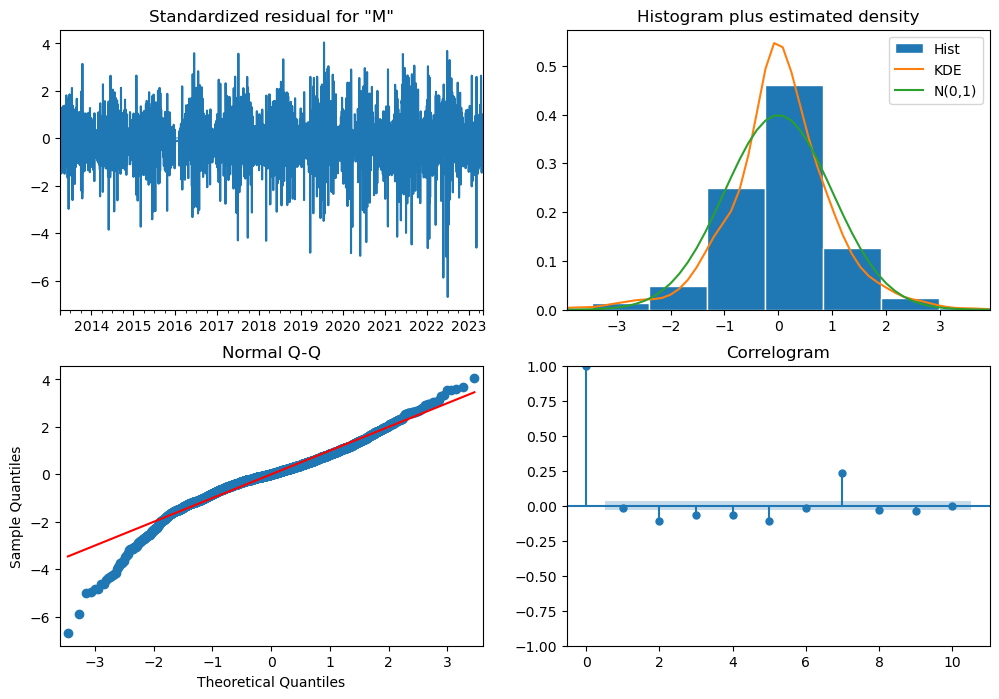

In [10]:
ar1_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [11]:
ar2_model = ARIMA(df1_train,order=(2,0,0))
ar2_results = ar2_model.fit()
print(ar2_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(2, 0, 0)   Log Likelihood              -25711.470
Date:                                Sat, 15 Jul 2023   AIC                          51430.941
Time:                                        10:32:30   BIC                          51455.786
Sample:                                    04-01-2013   HQIC                         51439.785
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4344.3332    132.549     32.775      0.000    4084.541    4604.125
ar.

In [12]:
get_MAPE_MAE_test(df1_test,ar2_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,ar2_results)

The MAPE Score is :  19.573371616600024
The MAE Score is : 186.54085739189532
------------------------------------------------------------
The MAPE Score is :  26.05159649905442
The MAE Score is : 186.54085739189532


(26.05159649905442, 186.54085739189532)

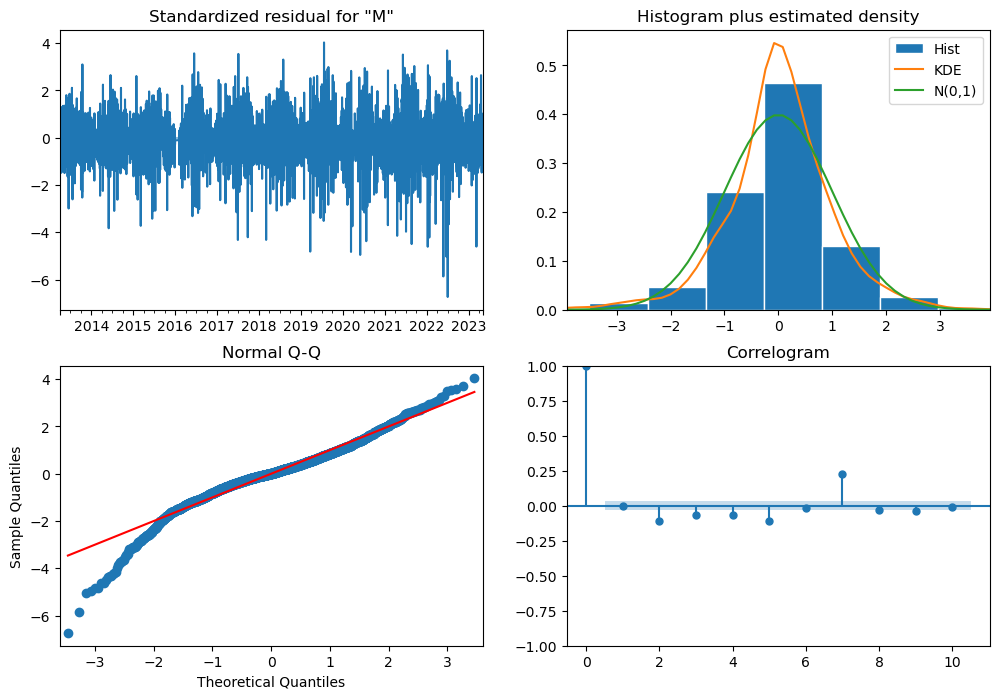

In [13]:
ar2_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [14]:
ar3_model = ARIMA(df1_train,order=(1,1,0))
ar3_results = ar3_model.fit()
print(ar3_results.summary())

                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(1, 1, 0)   Log Likelihood              -25734.074
Date:                                Sat, 15 Jul 2023   AIC                          51472.149
Time:                                        10:32:32   BIC                          51484.571
Sample:                                    04-01-2013   HQIC                         51476.570
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0340      0.013     -2.609      0.009      -0.060      -0.008
sig

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [15]:
get_MAPE_MAE_test(df1_test,ar3_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,ar3_results)

The MAPE Score is :  21.936788423146442
The MAE Score is : 187.72330567391364
------------------------------------------------------------
The MAPE Score is :  26.516721922844223
The MAE Score is : 187.72330567391364


(26.516721922844223, 187.72330567391364)

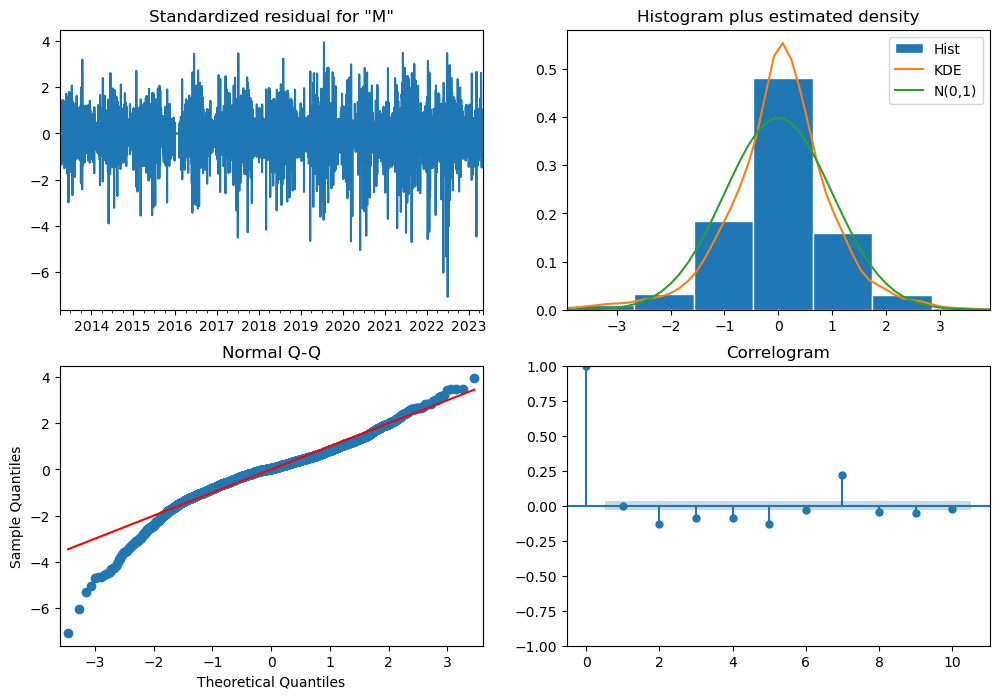

In [16]:
ar3_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [17]:
ar4_model = ARIMA(df1,order=(1,2,0))
ar4_results = ar4_model.fit()
print(ar4_results.summary())

                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3713
Model:                                 ARIMA(1, 2, 0)   Log Likelihood              -26868.477
Date:                                Sat, 15 Jul 2023   AIC                          53740.953
Time:                                        10:32:33   BIC                          53753.391
Sample:                                    04-01-2013   HQIC                         53745.379
                                         - 05-31-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4534      0.010    -44.156      0.000      -0.473      -0.433
sig

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [18]:
get_MAPE_MAE_test(df1_test,ar4_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,ar4_results)

The MAPE Score is :  90.90368715936549
The MAE Score is : 242.15781164635882
------------------------------------------------------------
The MAPE Score is :  27.171106412905008
The MAE Score is : 242.15781164635882


(27.171106412905008, 242.15781164635882)

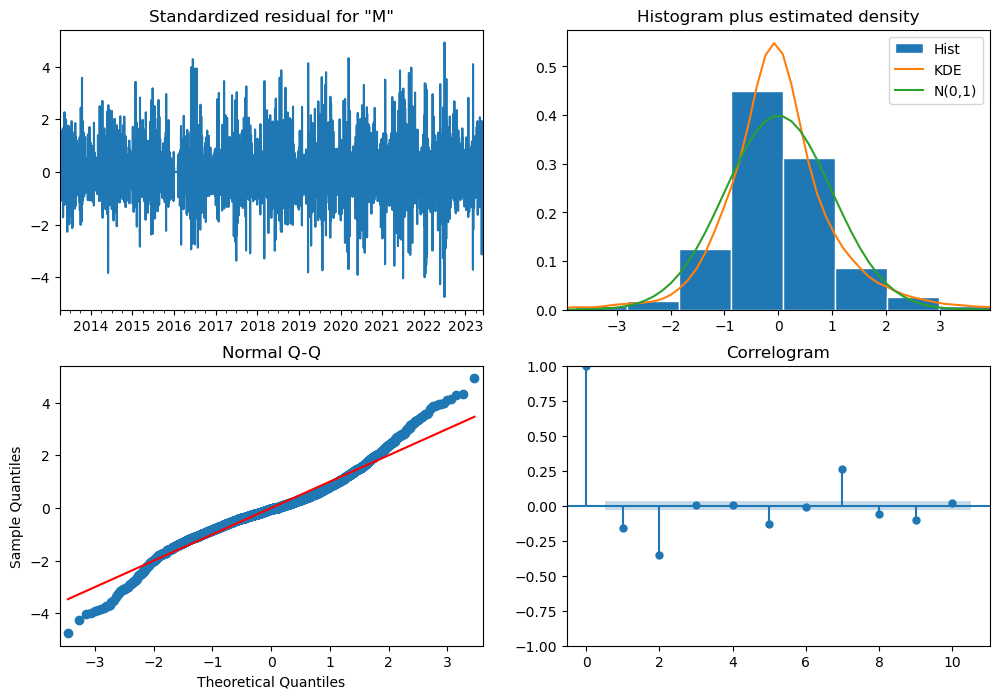

In [19]:
ar4_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [20]:
ma1_model = ARIMA(df1_train,order=(0,0,1))
ma1_results = ma1_model.fit()
print(ma1_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(0, 0, 1)   Log Likelihood              -28665.707
Date:                                Sat, 15 Jul 2023   AIC                          57337.414
Time:                                        10:32:37   BIC                          57356.048
Sample:                                    04-01-2013   HQIC                         57344.047
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4344.2823     19.060    227.921      0.000    4306.925    4381.640
ma.

In [21]:
get_MAPE_MAE_test(df1_test,ma1_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,ma1_results)

The MAPE Score is :  16.678325439608717
The MAE Score is : 480.81453118095686
------------------------------------------------------------
The MAPE Score is :  21.54983671682711
The MAE Score is : 480.81453118095686


(21.54983671682711, 480.81453118095686)

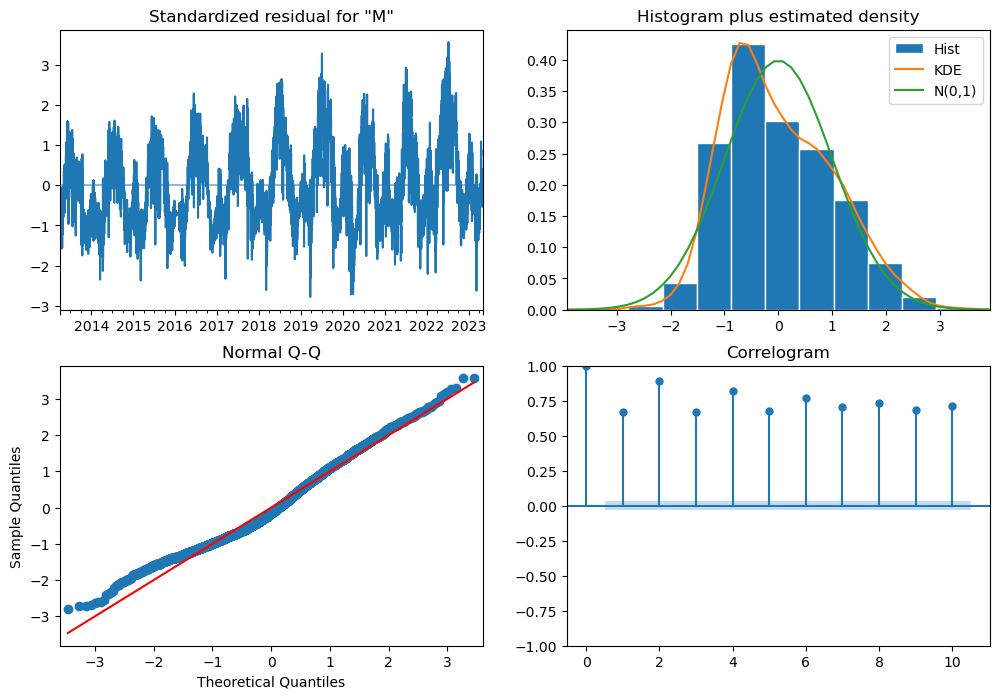

In [22]:
ma1_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [23]:
ma2_model = ARIMA(df1_train,order=(0,1,1))
ma2_results = ma2_model.fit()
print(ma2_results.summary())

                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(0, 1, 1)   Log Likelihood              -25733.299
Date:                                Sat, 15 Jul 2023   AIC                          51470.598
Time:                                        10:32:38   BIC                          51483.020
Sample:                                    04-01-2013   HQIC                         51475.020
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0467      0.013     -3.574      0.000      -0.072      -0.021
sig

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [24]:
get_MAPE_MAE_test(df1_test,ma2_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,ma2_results)

The MAPE Score is :  21.870289987265537
The MAE Score is : 187.83863667498937
------------------------------------------------------------
The MAPE Score is :  26.51079322087913
The MAE Score is : 187.83863667498937


(26.51079322087913, 187.83863667498937)

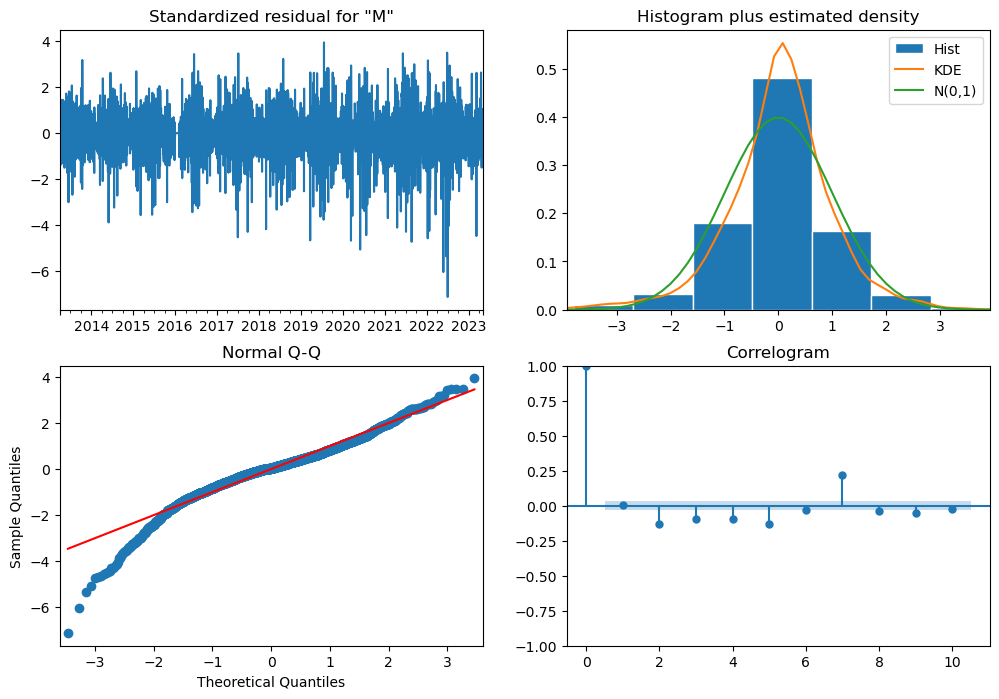

In [25]:
ma2_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [26]:
ma3_model = ARIMA(df1_train,order=(0,2,1))
ma3_results = ma3_model.fit()
print(ma3_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(0, 2, 1)   Log Likelihood              -25734.601
Date:                                Sat, 15 Jul 2023   AIC                          51473.203
Time:                                        10:32:41   BIC                          51485.624
Sample:                                    04-01-2013   HQIC                         51477.624
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9997      0.009   -116.211      0.000      -1.017      -0.983
sig

In [27]:
get_MAPE_MAE_test(df1_test,ar3_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,ar3_results)

The MAPE Score is :  21.936788423146442
The MAE Score is : 187.72330567391364
------------------------------------------------------------
The MAPE Score is :  26.516721922844223
The MAE Score is : 187.72330567391364


(26.516721922844223, 187.72330567391364)

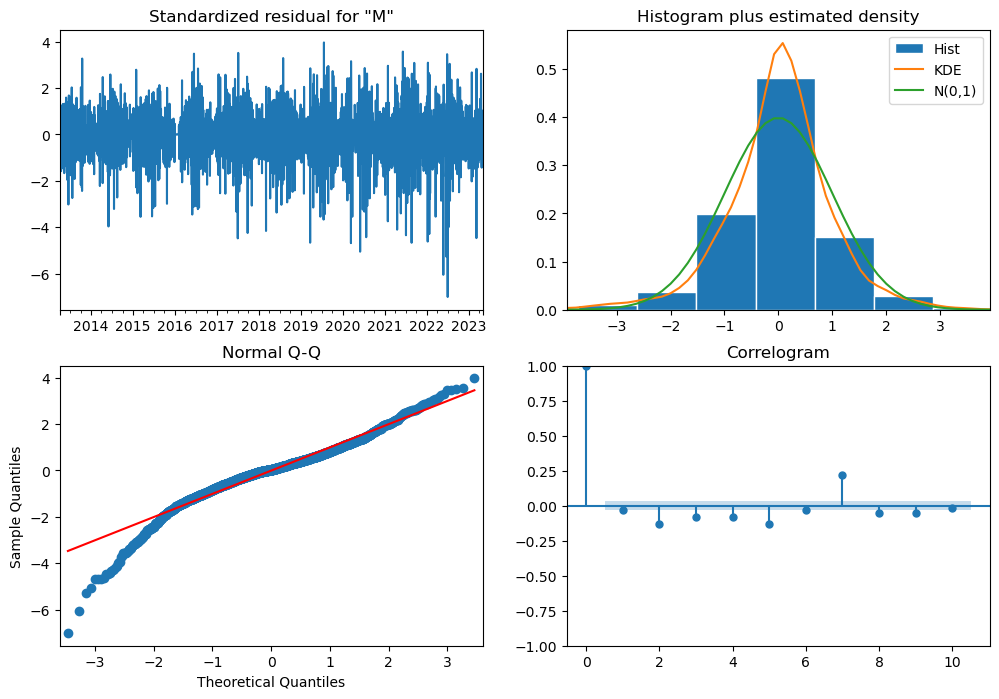

In [28]:
ma3_results.plot_diagnostics(figsize=(12,8))
plt.show()

## ARMA Models through AIC and BIC scores

In [29]:
# arma_results1 = []
# for p in range(10):
#     for q in range(10):
#         try:
#             results = ARIMA(df1,order=(p,0,q)).fit()
#             arma_results1.append((p,q,results.aic,results.bic))
#         except:
#             arma_results1.append((p,q,None,None))
arma_results1 = pd.read_csv("arma_results1.csv")

In [30]:
arma_results1 = pd.DataFrame(arma_results1,columns=['p','q','AIC','BIC'])
arma_results1.sort_values('AIC')

,p,q,AIC,BIC
88,8,8,51250.518689,51362.471407
98,9,8,51262.546636,51380.718950
97,9,7,51270.071854,51382.024572
99,9,9,51278.783792,51403.175701
89,8,9,51335.129558,51453.301871
...,...,...,...,...
4,0,4,53758.124605,53795.442178
3,0,3,54620.899919,54651.997896
2,0,2,55623.718108,55648.596489
1,0,1,57824.488179,57843.146966


In [31]:
arma_results1.to_csv("arma_results1.csv")
arma_results1.sort_values('BIC')

,p,q,AIC,BIC
88,8,8,51250.518689,51362.471407
98,9,8,51262.546636,51380.718950
97,9,7,51270.071854,51382.024572
99,9,9,51278.783792,51403.175701
89,8,9,51335.129558,51453.301871
...,...,...,...,...
4,0,4,53758.124605,53795.442178
3,0,3,54620.899919,54651.997896
2,0,2,55623.718108,55648.596489
1,0,1,57824.488179,57843.146966


In [32]:
arma1_results = ARIMA(df1_train,order=(8,0,8)).fit()
print(arma1_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(8, 0, 8)   Log Likelihood              -25382.625
Date:                                Sat, 15 Jul 2023   AIC                          50801.251
Time:                                        10:34:57   BIC                          50913.053
Sample:                                    04-01-2013   HQIC                         50841.049
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4344.3332    664.191      6.541      0.000    3042.542    5646.125
ar.

In [33]:
get_MAPE_MAE_test(df1_test,arma1_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,arma1_results)

The MAPE Score is :  18.40984432232057
The MAE Score is : 167.29646179423077
------------------------------------------------------------
The MAPE Score is :  26.271996891277254
The MAE Score is : 167.29646179423077


(26.271996891277254, 167.29646179423077)

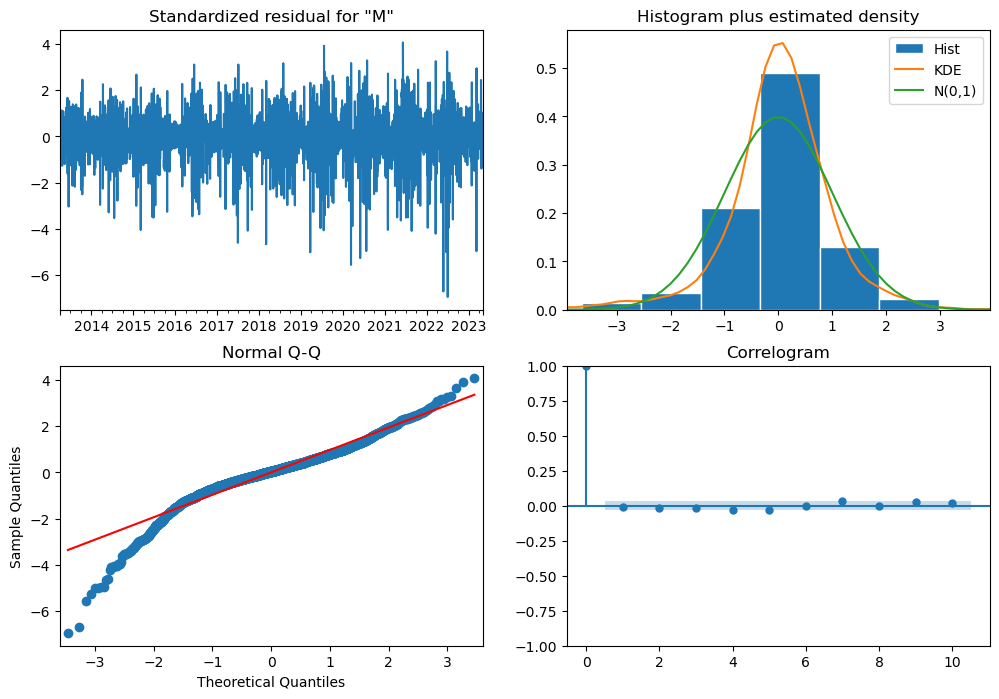

In [34]:
arma1_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [35]:
arma2_results = ARIMA(df1_train,order=(8,1,8)).fit()
print(arma2_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/

                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(8, 1, 8)   Log Likelihood              -25402.498
Date:                                Sat, 15 Jul 2023   AIC                          50838.995
Time:                                        10:37:03   BIC                          50944.581
Sample:                                    04-01-2013   HQIC                         50876.581
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5467      1.333      0.410      0.682      -2.066       3.159
ar.

In [36]:
get_MAPE_MAE_test(df1_test,arma2_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,arma2_results)

The MAPE Score is :  18.683044729233632
The MAE Score is : 168.76219908092003
------------------------------------------------------------
The MAPE Score is :  26.38514451986276
The MAE Score is : 168.76219908092003


(26.38514451986276, 168.76219908092003)

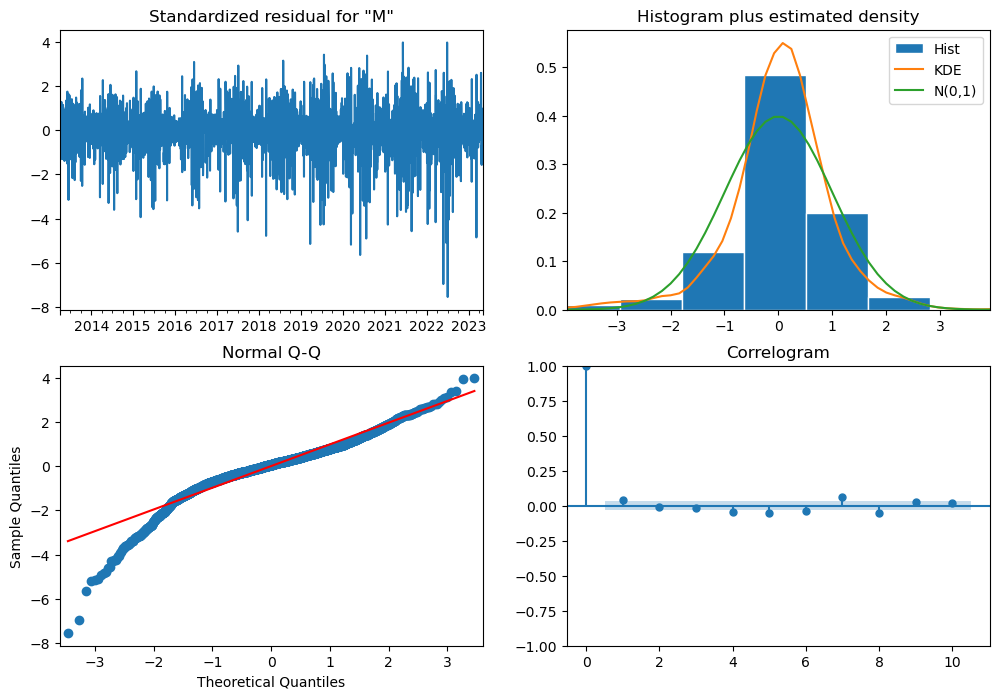

In [37]:
arma2_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [38]:
arma3_results = ARIMA(df1_train,order=(9,0,8)).fit()
print(arma3_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/

                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(9, 0, 8)   Log Likelihood              -25388.183
Date:                                Sat, 15 Jul 2023   AIC                          50814.366
Time:                                        10:39:31   BIC                          50932.379
Sample:                                    04-01-2013   HQIC                         50856.375
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4344.3332    260.830     16.656      0.000    3833.115    4855.551
ar.

In [39]:
get_MAPE_MAE_test(df1_test,arma3_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,arma3_results)

The MAPE Score is :  18.22350454673715
The MAE Score is : 167.35551858564926
------------------------------------------------------------
The MAPE Score is :  26.1754558275147
The MAE Score is : 167.35551858564926


(26.1754558275147, 167.35551858564926)

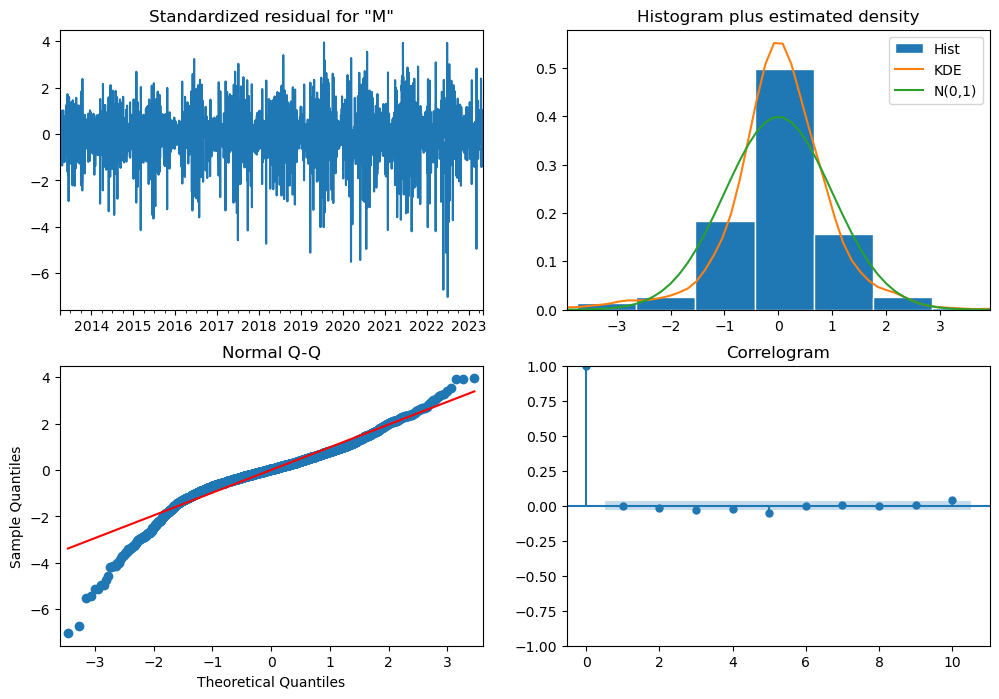

In [40]:
arma3_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [41]:
arma4_results = ARIMA(df1_train,order=(9,1,8)).fit()
print(arma4_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/

                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(9, 1, 8)   Log Likelihood              -25385.572
Date:                                Sat, 15 Jul 2023   AIC                          50807.144
Time:                                        10:41:56   BIC                          50918.941
Sample:                                    04-01-2013   HQIC                         50846.941
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5099      0.171      2.985      0.003       0.175       0.845
ar.

In [42]:
get_MAPE_MAE_test(df1_test,arma4_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,arma4_results)

The MAPE Score is :  18.44022879717418
The MAE Score is : 169.1030977201404
------------------------------------------------------------
The MAPE Score is :  26.38530646181594
The MAE Score is : 169.1030977201404


(26.38530646181594, 169.1030977201404)

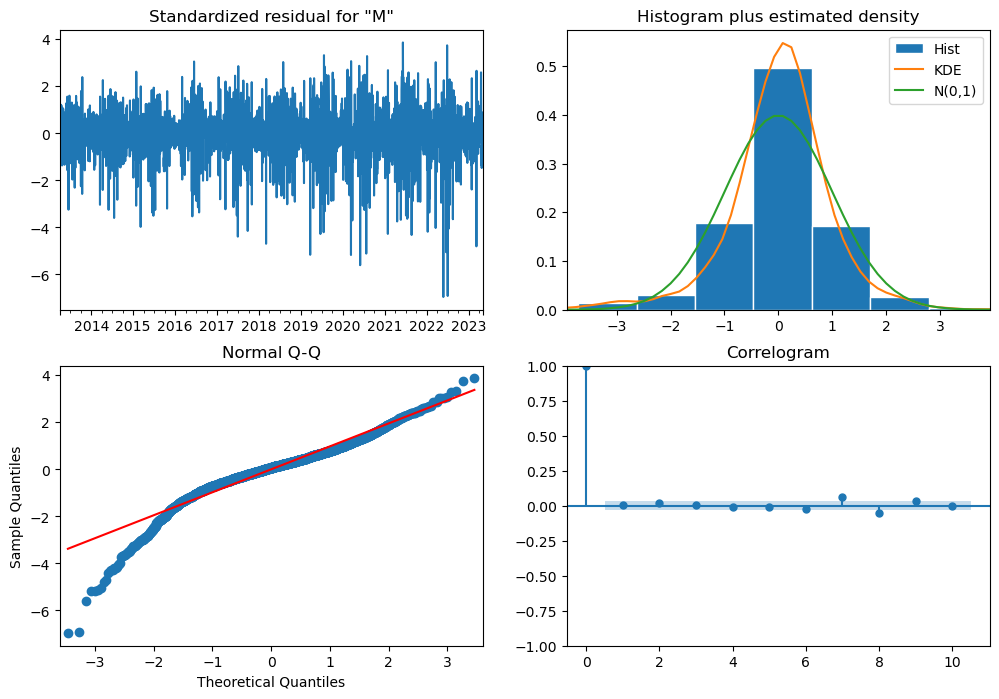

In [43]:
arma4_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [44]:
arma5_results = ARIMA(df1_train,order=(9,0,7)).fit()
print(arma5_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/

                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(9, 0, 7)   Log Likelihood              -25400.424
Date:                                Sat, 15 Jul 2023   AIC                          50836.848
Time:                                        10:44:16   BIC                          50948.650
Sample:                                    04-01-2013   HQIC                         50876.646
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4344.3332    206.888     20.999      0.000    3938.841    4749.826
ar.

In [45]:
get_MAPE_MAE_test(df1_test,arma5_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,arma5_results)

The MAPE Score is :  18.15734689214186
The MAE Score is : 168.36365604373077
------------------------------------------------------------
The MAPE Score is :  26.114037322477497
The MAE Score is : 168.36365604373077


(26.114037322477497, 168.36365604373077)

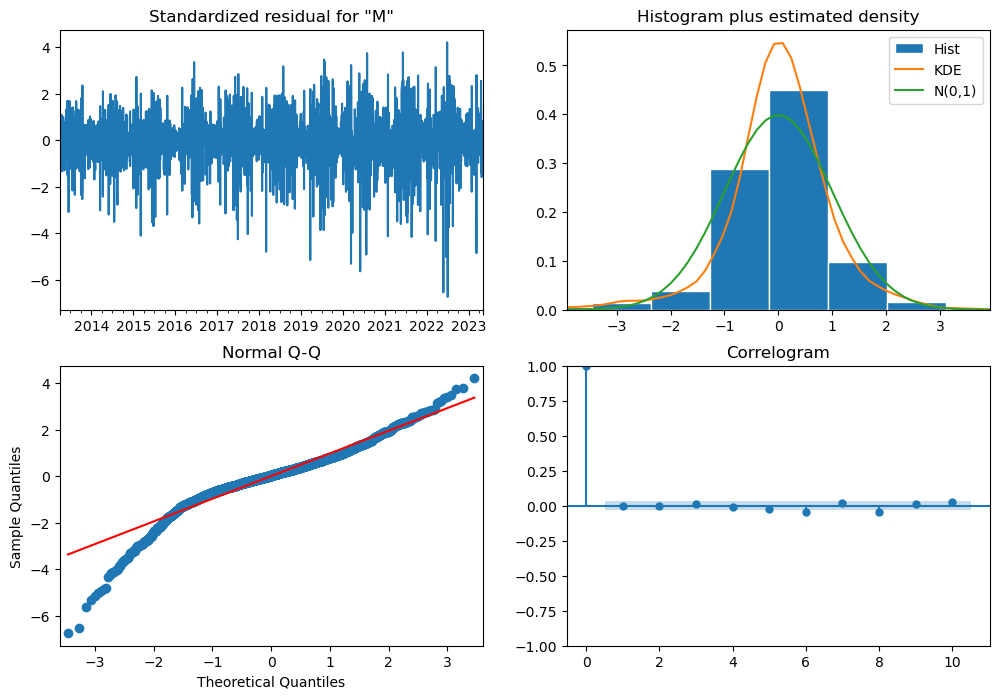

In [46]:
arma5_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [47]:
arma6_results = ARIMA(df1_train,order=(9,1,7)).fit()
print(arma6_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/

                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(9, 1, 7)   Log Likelihood              -25403.373
Date:                                Sat, 15 Jul 2023   AIC                          50840.746
Time:                                        10:46:20   BIC                          50946.332
Sample:                                    04-01-2013   HQIC                         50878.332
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0533      0.023     -2.295      0.022      -0.099      -0.008
ar.

In [48]:
get_MAPE_MAE_test(df1_test,arma6_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,arma6_results)

The MAPE Score is :  19.432719935034495
The MAE Score is : 168.5819502884086
------------------------------------------------------------
The MAPE Score is :  26.363983519969903
The MAE Score is : 168.5819502884086


(26.363983519969903, 168.5819502884086)

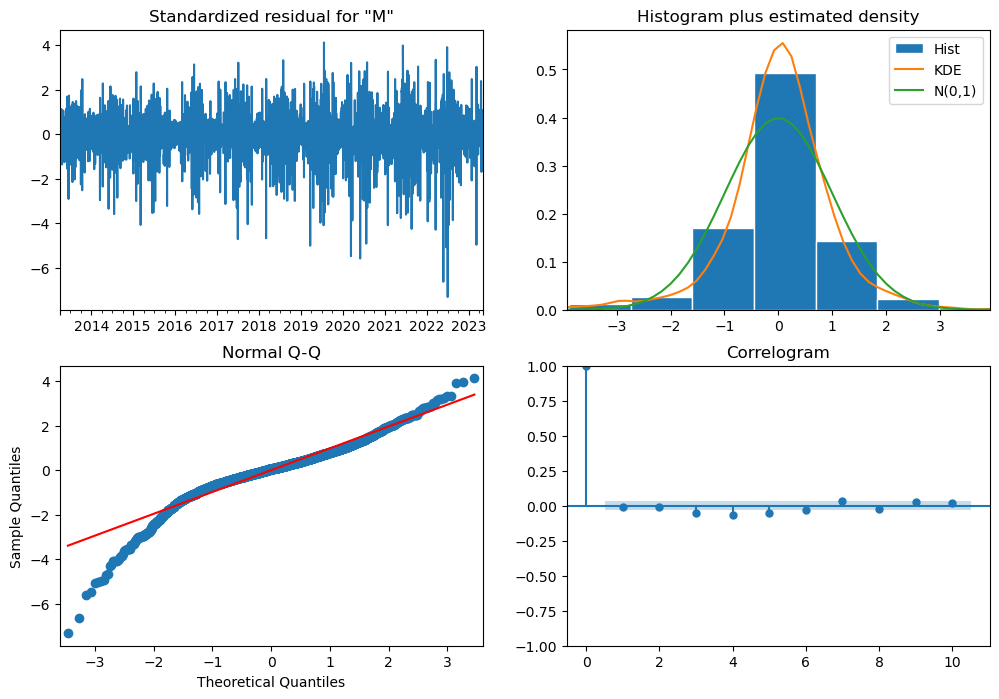

In [49]:
arma6_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [50]:
# Create auto_arima model
model1 = pm.auto_arima(df1_train,
                      seasonal=True, 
                      error_action='ignore',
                      suppress_warnings=True)

# Create auto_arima model
model2 = pm.auto_arima(df1_train,
                      seasonal=False, 
                      error_action='ignore',
                      suppress_warnings=True) 

# Print model summary
print(model1.summary())
print(model2.summary())



/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  ret

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3682
Model:               SARIMAX(5, 1, 4)   Log Likelihood              -25492.104
Date:                Sat, 15 Jul 2023   AIC                          51004.208
Time:                        11:16:56   BIC                          51066.318
Sample:                    04-01-2013   HQIC                         51026.318
                         - 04-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4789      0.112      4.283      0.000       0.260       0.698
ar.L2         -0.8928      0.044    -20.148      0.000      -0.980      -0.806
ar.L3          0.6705      0.094      7.108      0.0

In [51]:
model1 = ARIMA(df1_train,order=(5,1,4)).fit()

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


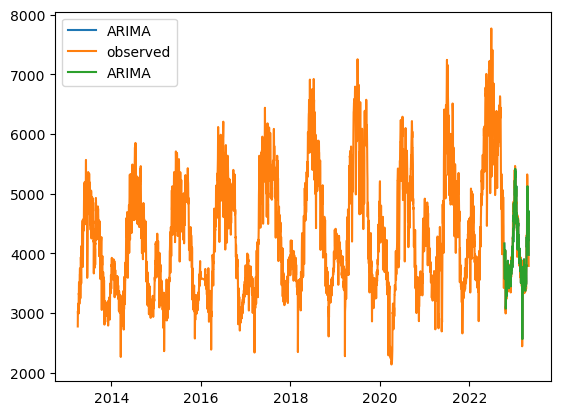

In [52]:
# Create ARIMA mean forecast
arima_pred = model1.get_prediction(start=-200)
arima_mean = arima_pred.predicted_mean

# Plot mean ARIMA and SARIMA predictions and observed
plt.plot(arima_mean.index,arima_mean, label='ARIMA')
plt.plot(df1_train.index,df1_train["Max.Demand met during the day (MW)"], label='observed')
plt.plot(arima_mean.index,arima_mean, label='ARIMA')
plt.legend()
plt.show()

In [53]:
get_MAPE_MAE_test(df1_test,model1)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,model1)

The MAPE Score is :  19.114301172901065
The MAE Score is : 177.50936063923933
------------------------------------------------------------
The MAPE Score is :  26.389385307696177
The MAE Score is : 177.50936063923933


(26.389385307696177, 177.50936063923933)